# **MATE Floats! Coding Notebook** - Day 3

Created by Ethan C. Campbell for NCAT/MATE/GO-BGC Marine Technology Summer Program

Wednesday, August 23, 2023

In [ ]:
import numpy as np                         # NumPy is an array and math library
import matplotlib.pyplot as plt            # Matplotlib is a visualization (plotting) library
import pandas as pd                        # Pandas lets us work with spreadsheet (.csv) data
from datetime import datetime, timedelta   # Datetime helps us work with dates and times

## Day 3, Part 1: `datetime` objects

**How do we track the passage of time in a data set?**

One option is to count the **time elapsed** since some starting time. For example, we might count the number of seconds, minutes, hours, or days. Instead of only using whole numbers (e.g., 1 hour, 2 hours, 3 hours, 4 hours, etc.), we usually use **fractional times** (units with decimals, like 0.75 hours, 1.0 hours, 1.25 hours, 1.5 hours, etc.).

As an alternative, we may want to simply track the dates and times themselves. After all, it is important to know what date and what time of day a measurement was taken.

For this, we use the **`datetime`** package in Python. We have already imported it above using:

> **`from datetime import datetime, timedelta`**

`datetime` allows us to create a new type of variable called a **`datetime` object**. To do this, we use the following function syntax:

> **`datetime(YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,MICROSECOND)`**

For example:

In [ ]:
current_dt = datetime(2023,8,23,12,0,0,0)  # This is 8/23/23 at 12:00:00.0p
current_dt = datetime(2023,8,23,12)        # Note: this gives the same result

print(current_dt)

2023-08-23 12:00:00


To retrieve part of a datetime from a `datetime` object called `dt`, you can use the following syntax:

```
dt.year
dt.month
dt.day
dt.hour
dt.minute
dt.second
dt.microsecond
```

For example:

In [ ]:
print(current_dt.year)

2023


***Try creating your own datetime object. What happens when you subtract one datetime from another?***

In [ ]:
# Write your code here:
new_dt = datetime(2023,8,24,current_dt.hour,0)
print(new_dt - current_dt)

1 day, 0:00:00


The great thing about `datetime` objects is that you can use them just like numbers:
* You can add and subtract them.
* You can put them in lists and arrays.
* `Matplotlib` knows to treat datetimes like numbers in plots.

## Day 3, Part 2: Loading sensor time series data

Up until now, we've been using data that we've typed directly into Python. However, most real-world data is stored in files that we'd like to open using Python.

The most common type of data file is a **spreadsheet**, which has rows and columns. Generally, the columns will have column labels.

Spreadsheets are often stored in **comma-separated value (CSV)** format, with the file extension being `.csv`. Data files in this format can be opened using Microsoft Excel or Google Sheets, as well as Python.

In Python, we use the `pandas` package to work with spreadsheet data. We imported the package earlier using:

> `import pandas as pd`

Just like NumPy has arrays, Pandas has two types of objects: `Series` and `DataFrame`. This is what they look like:
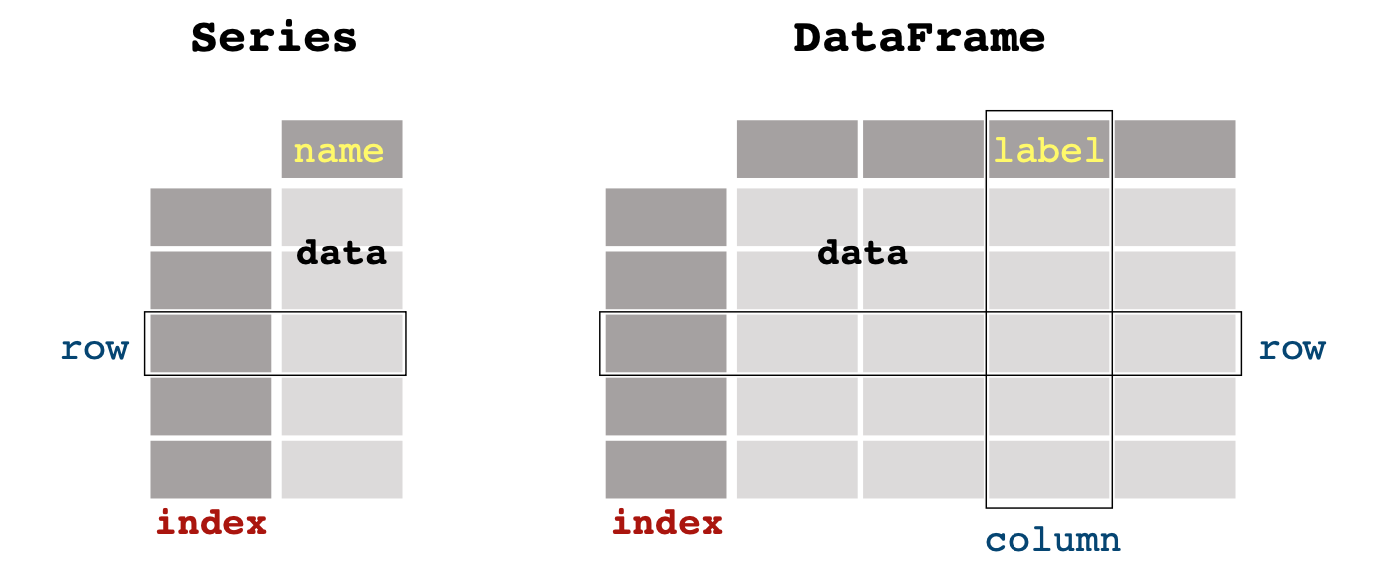

For now, we'll just be applying simple operations to read spreadsheet data using `pandas`. But if you would like to learn more, check out these [lesson slides](https://ethan-campbell.github.io/OCEAN_215/materials/lessons/lesson_9.pdf).

Let's see how we can visualize data from the sensors that you built.

***First, download two sample data files from Google Drive here:*** https://drive.google.com/drive/folders/18c42CtHgthenSEoPP9WKHEVrC1jn1Dr8?usp=drive_link. They should be named:
* `temp_data_0m.csv` (data from 0 meters depth)
* `temp_data_5m.csv` (data from 5 meters depth)

Next, we can upload the files to this Google Colab notebook. ***Click the sidebar folder icon on the left, then use the page-with-arrow icon at the top to select the files and upload them.*** NOTE: uploaded files will be deleted from Google Colab when you refresh this notebook!

We will specify each **filepath** using string variables:

In [ ]:
filepath_0m = '/content/temp_data_0m.csv'
filepath_5m = '/content/temp_data_5m.csv'

Now, we can load the files using `pandas`:

> **`pd.read_csv(FILEPATH, ARGUMENTS...)`**

This function is very customizable using the many optional `ARGUMENTS`, which allow it to handle almost any file. You can find documentation about the arguments [at this link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

***Let's first take a look at the data file using a simple text editor. Notice the long header. What argument can we use to exclude the header from being loaded?***

Below, we'll load a data file using ``pd.read_csv()`` and store the data into a new variable.

We can look at the data using **`display()`** (which is a fancy version of `print()` for DataFrames):

In [ ]:
data_0m = pd.read_csv(filepath_0m)

display(data_0m)

,7/28/2023 11:47,1,28af1394,21.375
0,7/28/2023 11:48,1,28af1394,21.3750
1,7/28/2023 11:49,1,28af1394,21.3750
2,7/28/2023 11:50,1,28af1394,21.3750
3,7/28/2023 11:51,1,28af1394,21.5000
4,7/28/2023 11:52,1,28af1394,21.4375
...,...,...,...,...
105,7/28/2023 13:38,1,28af1394,21.8750
106,7/28/2023 13:39,1,28af1394,21.8750
107,7/28/2023 13:40,1,28af1394,21.9375
108,7/28/2023 13:41,1,28af1394,21.8750


***What do you notice?***

It appears that we'll need to specify a few additional arguments within `pd.read_csv()`.

* `index_col`: this argument accepts an integer (e.g., 0) and tells `pandas` to convert that column into an index
* `header`: this argument specifies which line of the file to use for column labels (default: `header=0`), or use `header=None` if there are no labels
* `names`: to specify column labels, give a list of strings with each label
* `parse_dates`: to tell Python to translate certain column(s) into `datetime` objects, give it those column names or indices inside a list

Remember that you can consult the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you need more information.

Below, we will load in the two data files using `pd.read_csv()` with the function arguments above:

In [ ]:
data_0m = pd.read_csv(filepath_0m,index_col=0,header=None,names=['Datetime','ID','Serial','Temp'],parse_dates=['Datetime'])
data_5m = pd.read_csv(filepath_5m,index_col=0,header=None,names=['Datetime','ID','Serial','Temp'],parse_dates=['Datetime'])

display(data_5m)

,ID,Serial,Temp
Datetime,,,
2023-07-28 10:48:00,1,28fc3097,19.8125
2023-07-28 11:06:00,1,28fc3097,19.5625
2023-07-28 11:08:00,1,28fc3097,19.5625
2023-07-28 11:09:00,1,28fc3097,19.5000
2023-07-28 11:10:00,1,28fc3097,19.5000
2023-07-28 11:11:00,1,28fc3097,19.5625
2023-07-28 11:14:00,1,28fc3097,19.6250
2023-07-28 11:19:00,1,28fc3097,20.3750
2023-07-28 11:31:00,1,28fc3097,19.7500


## Day 3, Part 3: Plotting sensor time series data

The data in a `pandas` DataFrame is similar to a NumPy 2-D array, except we use **column labels** to refer to columns and **index** values to refer to rows.

To retrieve a specific column, we use bracket notation: **`data_frame[COLUMN_LABEL]`**.

In [ ]:
# For example:
data_0m['Temp']

Datetime
2023-07-28 11:47:00    21.3750
2023-07-28 11:48:00    21.3750
2023-07-28 11:49:00    21.3750
2023-07-28 11:50:00    21.3750
2023-07-28 11:51:00    21.5000
                        ...   
2023-07-28 13:38:00    21.8750
2023-07-28 13:39:00    21.8750
2023-07-28 13:40:00    21.9375
2023-07-28 13:41:00    21.8750
2023-07-28 13:42:00    21.8750
Name: Temp, Length: 111, dtype: float64

In [ ]:
data_0m.index

DatetimeIndex(['2023-07-28 11:47:00', '2023-07-28 11:48:00',
               '2023-07-28 11:49:00', '2023-07-28 11:50:00',
               '2023-07-28 11:51:00', '2023-07-28 11:52:00',
               '2023-07-28 11:53:00', '2023-07-28 11:54:00',
               '2023-07-28 11:55:00', '2023-07-28 11:56:00',
               ...
               '2023-07-28 13:33:00', '2023-07-28 13:34:00',
               '2023-07-28 13:35:00', '2023-07-28 13:36:00',
               '2023-07-28 13:37:00', '2023-07-28 13:38:00',
               '2023-07-28 13:39:00', '2023-07-28 13:40:00',
               '2023-07-28 13:41:00', '2023-07-28 13:42:00'],
              dtype='datetime64[ns]', name='Datetime', length=111, freq=None)

***Using the data variables for each of the two files, try plotting the two time series (time vs. temperature) using `plt.plot()`.***

IMPORTANT: instead of referencing the datetime column using `data_0m['Datetime']`, we'll have to reference it using `data_0m.index` since we designated it as the index.

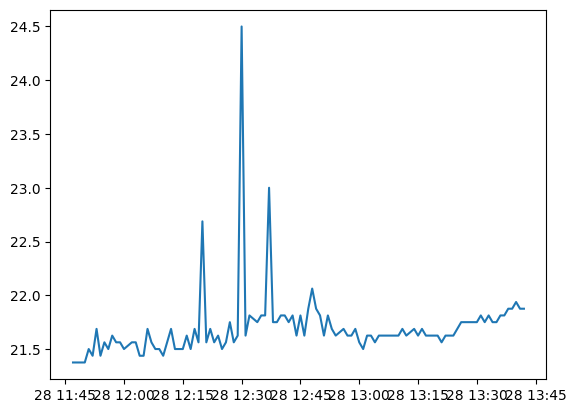

In [ ]:
# Write your code below:
plt.plot(data_0m.index,data_0m['Temp'])

You may want to use two additional Matplotlib functions:

* **`plt.gcf().autofmt_xdate()`**: this formats the x-axis datetimes more neatly
* **`plt.xlim([START,END])`**: this sets the lower and upper limits of the x-axis; `START` and `END` can be specified as `datetime` objects (or can be `None`)

***Try repeating the plot above using these functions:***

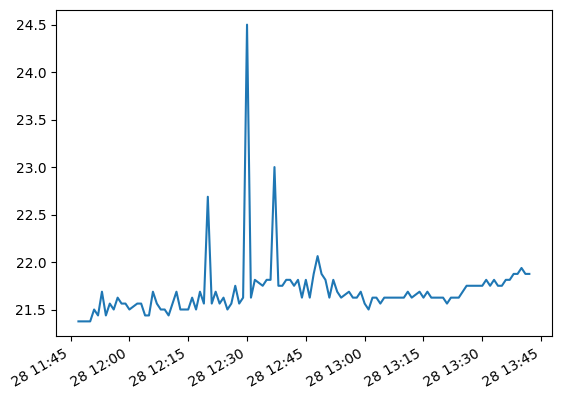

In [ ]:
# Write your code below:
plt.plot(data_0m.index,data_0m['Temp'])
plt.gcf().autofmt_xdate()

## Day 3, Part 4: Other useful `pandas` functions

To select a certain index value of a column, use `.loc[]`:

> **`data[COLUMN_NAME].loc[INDEX_VALUE]`**

To select multiple index values, use slicing:

> **`data[COLUMN_NAME].loc[INDEX_START:INDEX_END]`**

For example:


In [ ]:
# Temperature only, convered to a NumPy array:
data_0m['Temp']

In [ ]:
# Select a single value of temperature
data_0m['Temp'].loc[datetime(2023,7,28,11,49)]

In [ ]:
# Select a range of temperature measurements
data_0m['Temp'].loc[datetime(2023,7,28,11,49):datetime(2023,7,28,11,51)]

To convert a column from `pandas` format to a NumPy array, use **`.values`**:

In [ ]:
# Pandas format, including the Datetime index:
data_0m['Temp']

In [ ]:
# Temperature only, convered to a NumPy array:
data_0m['Temp'].values